## BABY NAMES 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [11]:
df=pd.read_csv('NationalNames.csv')
df.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB


<AxesSubplot:xlabel='Gender'>

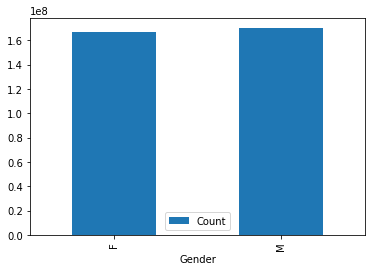

In [13]:
df.groupby("Gender").sum().plot.bar(y="Count")

In [14]:
years=range(1880,2014+1)

Text(0.5, 1.0, 'Number of births- (2005-2014)')

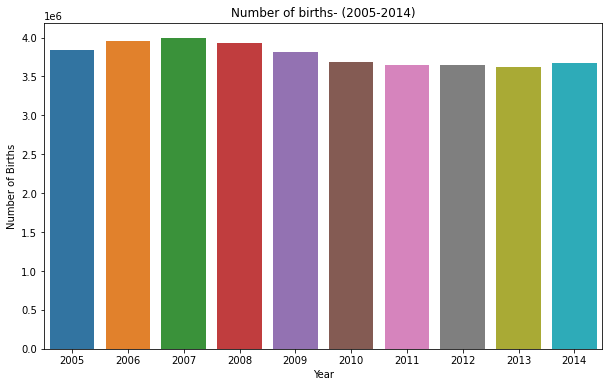

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df.groupby("Year")["Count"].sum().values[-10:].ravel(),x=list(years)[-10:])
plt.ylabel("Number of Births")
plt.xlabel("Year")
plt.title("Number of births- (2005-2014)")

In [16]:
total_births=df.pivot_table(values="Count",index="Year",
                            columns="Gender",aggfunc=sum)

In [17]:
total_births.tail()

Gender,F,M
Year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


<AxesSubplot:title={'center':'Total no of births by gender and year'}, xlabel='Year'>

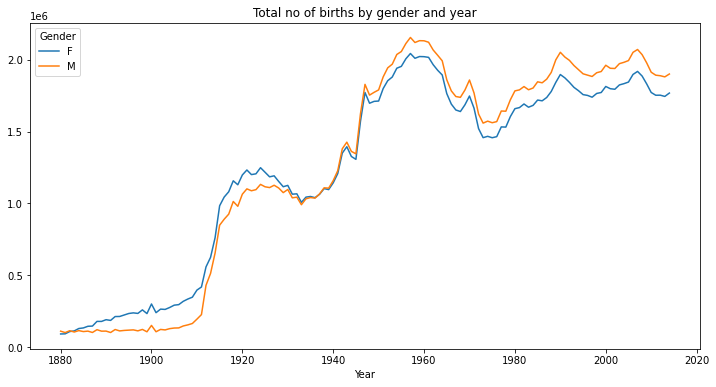

In [18]:
total_births.plot(title="Total no of births by gender and year",figsize=(12,6))

Inserting a column prop with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name. Thus, we group the data by year and sex, then add the new column to each group

Result can be interpreted as: In the year 1880, every 77 female out of 100 were name "Mary"

In [19]:
def add_prop(group):
    group['prop'] = group.Count / group.Count.sum()
    return group

df = df.groupby(['Year', 'Gender']).apply(add_prop)

In [20]:
df

,Id,Name,Year,Gender,Count,prop
0,1,Mary,1880,F,7065,0.077643
1,2,Anna,1880,F,2604,0.028618
2,3,Emma,1880,F,2003,0.022013
3,4,Elizabeth,1880,F,1939,0.021309
4,5,Minnie,1880,F,1746,0.019188
...,...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5,0.000003
1825429,1825430,Zymeer,2014,M,5,0.000003
1825430,1825431,Zymiere,2014,M,5,0.000003
1825431,1825432,Zyran,2014,M,5,0.000003


In [21]:
#sanity check
df.groupby(['Year','Gender']).prop.sum()

Year  Gender
1880  F         1.0
      M         1.0
1881  F         1.0
      M         1.0
1882  F         1.0
               ... 
2012  M         1.0
2013  F         1.0
      M         1.0
2014  F         1.0
      M         1.0
Name: prop, Length: 270, dtype: float64

In [22]:
def get_top_1000(group):
    return group.sort_values(by="Count",ascending=False)[:1000]

top1000=df.groupby(['Year','Gender']).apply(get_top_1000)
top1000.reset_index(inplace=True,drop=True)

In [23]:
top1000.take([1000,2000,3000])

,Id,Name,Year,Gender,Count,prop
1000,1001,Charley,1880,M,305,0.002760
2000,2059,Nancy,1881,F,429,0.004665
3000,3059,Eli,1881,M,97,0.000963


In [24]:
# we can see that both genders could contain the same name
top1000.loc[top1000["Name"] == "Mary"].groupby("Gender").Count.sum()


Gender
F    4115282
M      13816
Name: Count, dtype: int64

### Analyzing the Naming Trend

In [25]:
#splitting the data into male and female
boys=top1000[top1000.Gender=="M"]
girls=top1000[top1000.Gender=="F"]


In [26]:
total_births=top1000.pivot_table(values='Count',index='Year',
                            columns='Name',aggfunc=sum)
total_births

Name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
Year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,450.0,4657.0,NaN,438.0,7450.0,227.0,NaN,281.0,NaN,299.0,...,NaN,6261.0,5200.0,508.0,NaN,NaN,NaN,NaN,NaN,259.0
2011,274.0,5104.0,NaN,436.0,7606.0,NaN,NaN,NaN,NaN,287.0,...,NaN,6292.0,6392.0,523.0,NaN,NaN,NaN,NaN,NaN,313.0
2012,223.0,5495.0,NaN,435.0,7509.0,NaN,NaN,NaN,NaN,NaN,...,NaN,6435.0,7452.0,516.0,NaN,NaN,NaN,NaN,NaN,434.0


In [30]:
subset=total_births[['John','Mary','Harry','Aaron']]

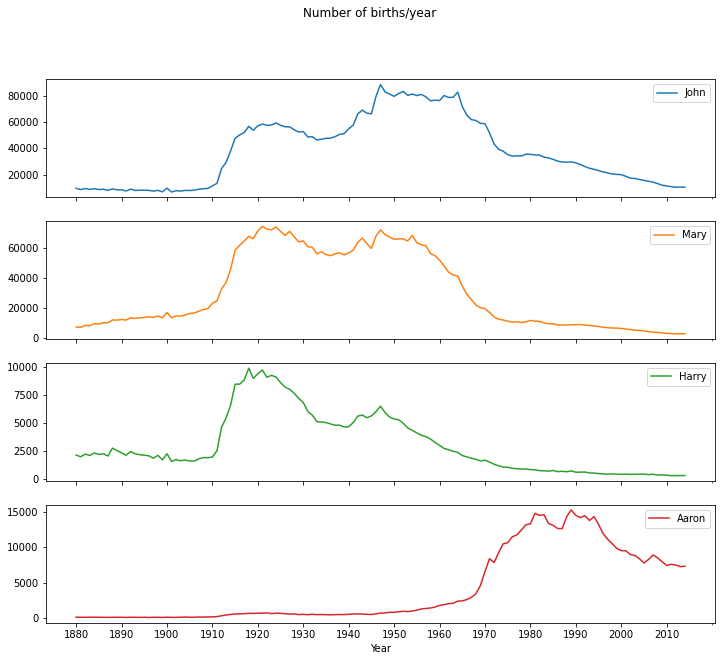

In [31]:
_=subset.plot(subplots=True,figsize=(12,10),grid=False,
             title="Number of births/year")
_=plt.xticks(range(1880,2015,10))

## Measuring the increase in the naming diversity

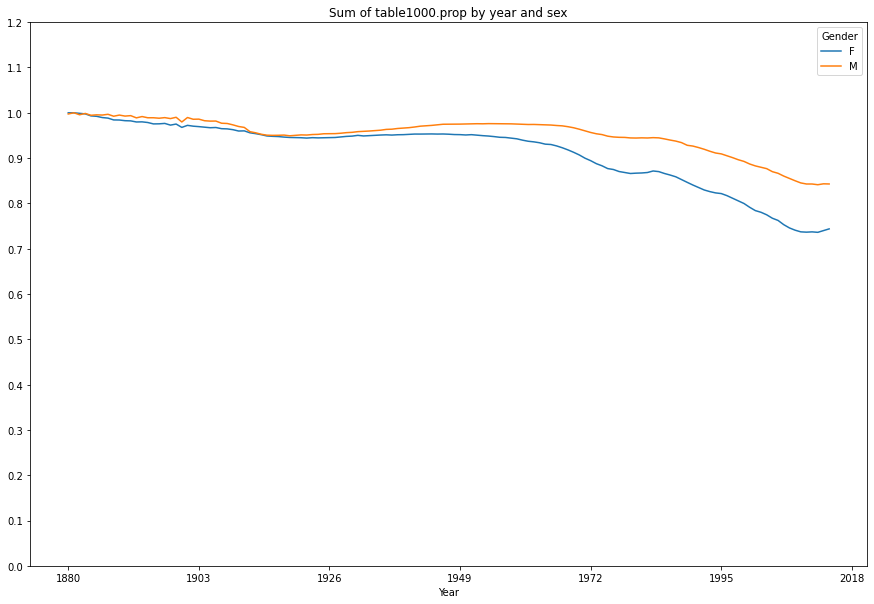

In [34]:
# decrease in usage of popular names

table = top1000.pivot_table(values='prop', index='Year',
                            columns='Gender', aggfunc=sum)
_ = table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2019, 23),
           figsize=(15, 10)
)